In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# load the raw datasets
train_features = pd.read_csv(
    "../data/raw/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv"
)

train_labels = pd.read_csv(
    "../data/raw/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv"
)

In [64]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [65]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [66]:
# Check if there are any missing values in the train_features dataset
missing_values = train_features.isnull().sum()
print("Missing values in train_features:\n", missing_values[missing_values > 0])

Missing values in train_features:
 ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
dtype: int64


In [67]:
# Missing values in the train_labels dataset
missing_values_labels = train_labels.isnull().sum()
print(
    "Missing values in train_labels:\n",
    missing_values_labels[missing_values_labels > 0],
)

Missing values in train_labels:
 Series([], dtype: int64)


In [68]:
# Extract data for the IQ city
iq_features = train_features[train_features["city"] == "iq"]
iq_labels = train_labels[train_labels["city"] == "iq"]

In [69]:
iq_full_data = iq_features.copy()
# Add the total cases columnd to iq_labels
iq_full_data["total_cases"] = iq_labels["total_cases"]

In [48]:
iq_full_data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [70]:
iq_full_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [71]:
# Remove the week_Start_data and city columns from the datafram
iq_full_data = iq_full_data.drop(columns=["city", "week_start_date"])

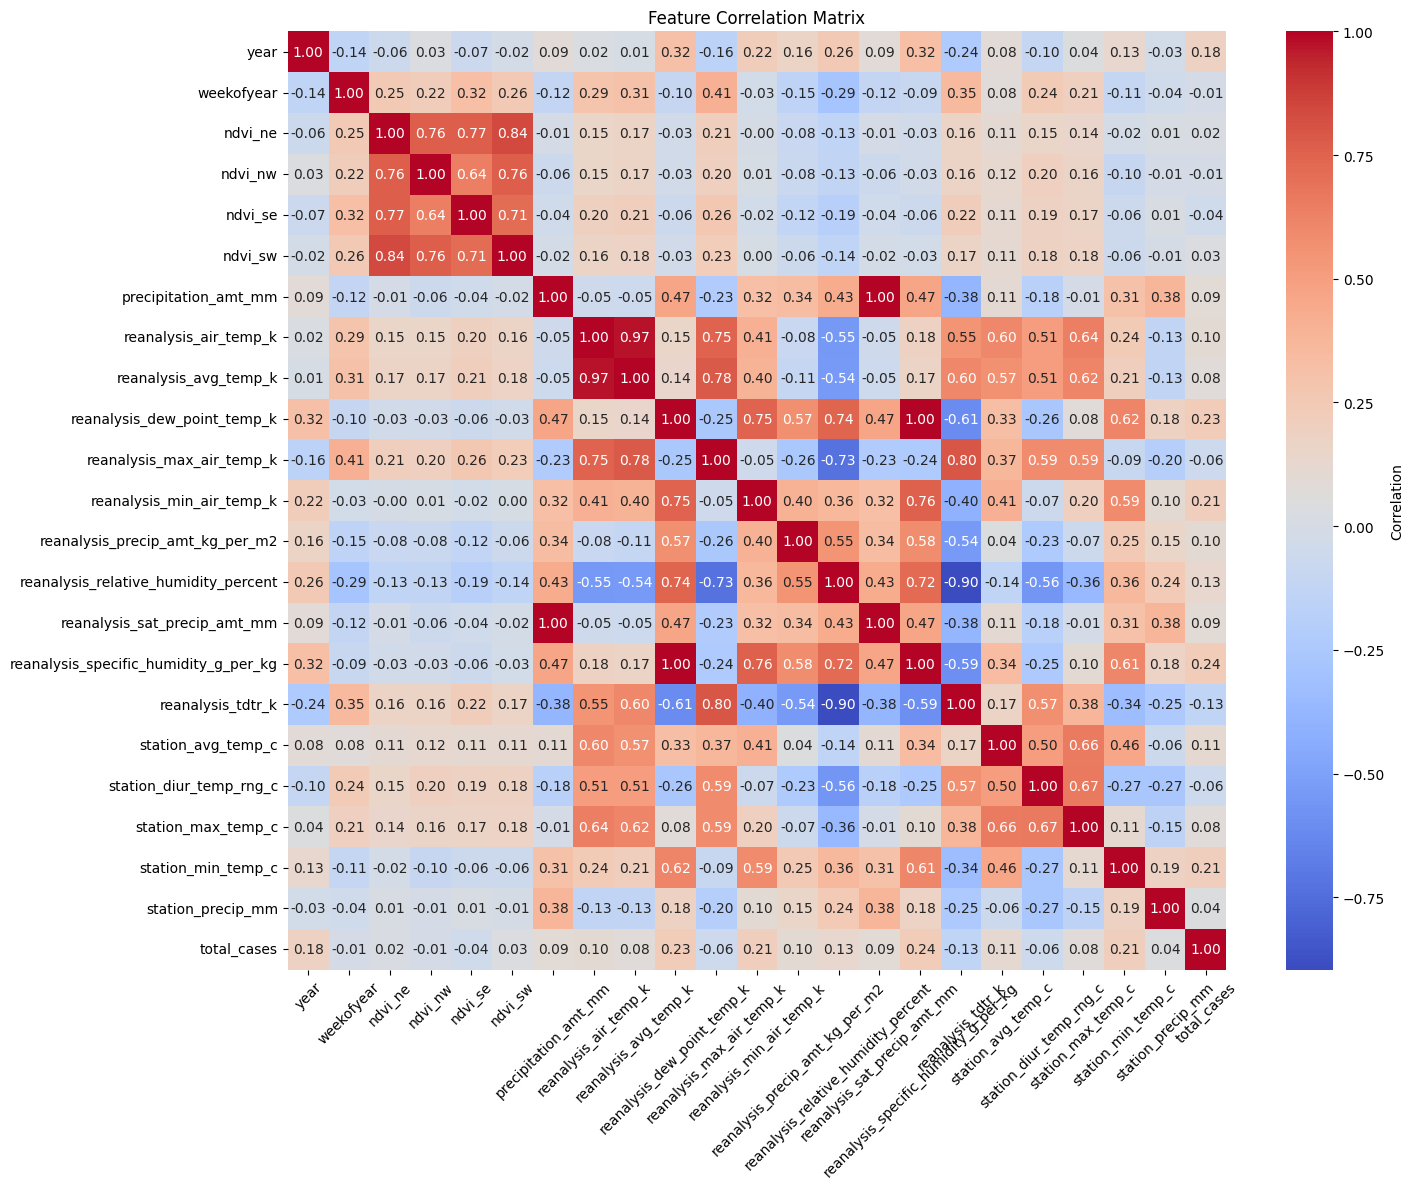

In [72]:
corr = iq_full_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"label": "Correlation"},
)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
# Select features of interest
features_of_interest = [
    "ndvi_ne",
    "ndvi_nw",
    "ndvi_se",
    "ndvi_sw",
    "reanalysis_specific_humidity_g_per_kg",
    "station_avg_temp_c",
    "station_min_temp_c",
    "weekofyear",
]
# Create a new DataFrame with the selected features and total_cases
iq_selected_features = iq_full_data[features_of_interest + ["total_cases"]]

iq_selected_features

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_min_temp_c,weekofyear,total_cases
936,0.192886,0.132257,0.340886,0.247200,16.651429,26.400000,20.7,26,0
937,0.216833,0.276100,0.289457,0.241657,16.862857,26.900000,20.8,27,0
938,0.176757,0.173129,0.204114,0.128014,17.120000,26.800000,20.7,28,0
939,0.227729,0.145429,0.254200,0.200314,14.431429,25.766667,14.7,29,0
940,0.328643,0.322129,0.254371,0.361043,15.444286,26.600000,19.1,30,0
...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,18.485714,28.633333,22.4,21,5
1452,0.160157,0.160371,0.136043,0.225657,18.070000,27.433333,21.7,22,8
1453,0.247057,0.146057,0.250357,0.233714,17.008571,24.400000,19.2,23,1
1454,0.333914,0.245771,0.278886,0.325486,16.815714,25.433333,21.0,24,1


In [74]:
# Add a new feature that sums the NDVI values across all quadrants
iq_selected_features["ndvi_sum"] = iq_selected_features.filter(like="ndvi").sum(axis=1)
iq_selected_features = iq_selected_features.drop(
    columns=[
        "ndvi_ne",
        "ndvi_nw",
        "ndvi_se",
        "ndvi_sw",
    ]
)

# Add lagged weather features by t-3 and remove the original weather features
weather_features = [
    "reanalysis_specific_humidity_g_per_kg",
    "station_avg_temp_c",
    "station_min_temp_c",
]

for feature in weather_features:
    iq_selected_features[f"{feature}_lagged"] = iq_selected_features[feature].shift(3)
    iq_selected_features = iq_selected_features.drop(columns=[feature])

iq_selected_features

/var/folders/6f/1zp6csbj2vj6hdqnhh74knt80000gn/T/ipykernel_63637/2322021892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_selected_features["ndvi_sum"] = iq_selected_features.filter(like="ndvi").sum(axis=1)


,weekofyear,total_cases,ndvi_sum,reanalysis_specific_humidity_g_per_kg_lagged,station_avg_temp_c_lagged,station_min_temp_c_lagged
936,26,0,0.913228,NaN,NaN,NaN
937,27,0,1.024047,NaN,NaN,NaN
938,28,0,0.682014,NaN,NaN,NaN
939,29,0,0.827671,16.651429,26.400000,20.7
940,30,0,1.266186,16.862857,26.900000,20.8
...,...,...,...,...,...,...
1451,21,5,1.210507,18.602857,27.600000,21.4
1452,22,8,0.682228,18.391429,27.400000,21.2
1453,23,1,0.877186,14.908571,25.633333,20.0
1454,24,1,1.184057,18.485714,28.633333,22.4


In [75]:
# Drop missing values
iq_selected_features = iq_selected_features.dropna()

# Sin and Cos transformations for weekofyear
iq_selected_features["weekofyear_sin"] = np.sin(
    2 * np.pi * iq_selected_features["weekofyear"] / 52
)
iq_selected_features["weekofyear_cos"] = np.cos(
    2 * np.pi * iq_selected_features["weekofyear"] / 52
)

/var/folders/6f/1zp6csbj2vj6hdqnhh74knt80000gn/T/ipykernel_63637/2698242218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_selected_features["weekofyear_sin"] = np.sin(
/var/folders/6f/1zp6csbj2vj6hdqnhh74knt80000gn/T/ipykernel_63637/2698242218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_selected_features["weekofyear_cos"] = np.cos(


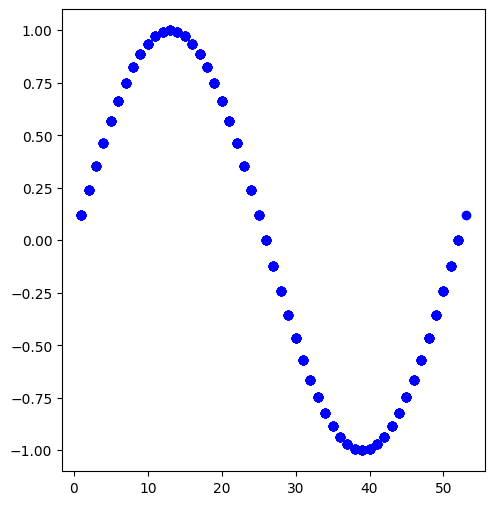

In [77]:
# Plot the sin and cos transformations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(
    iq_selected_features["weekofyear"],
    iq_selected_features["weekofyear_sin"],
    label="Sin Transformation",
    color="blue",
)

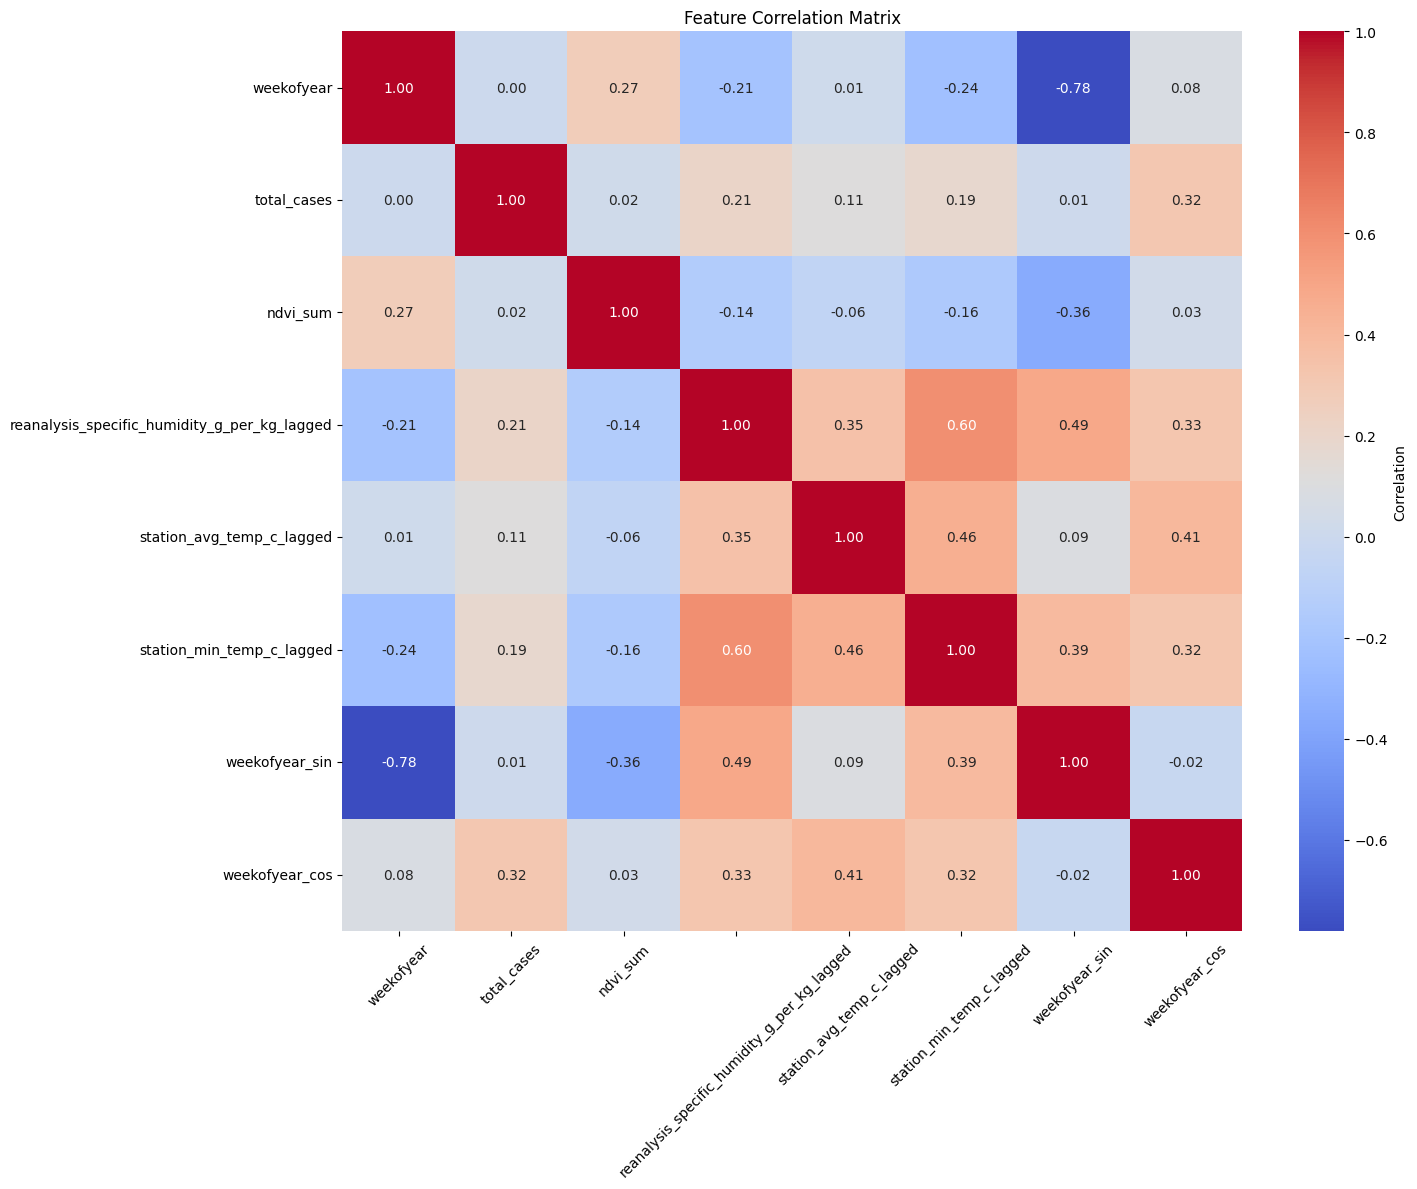

In [61]:
corr = iq_selected_features.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"label": "Correlation"},
)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Add time lag of t-3 to the total number of cases
iq_full_data["total_cases_t-3"] = iq_full_data["total_cases"].shift(3)

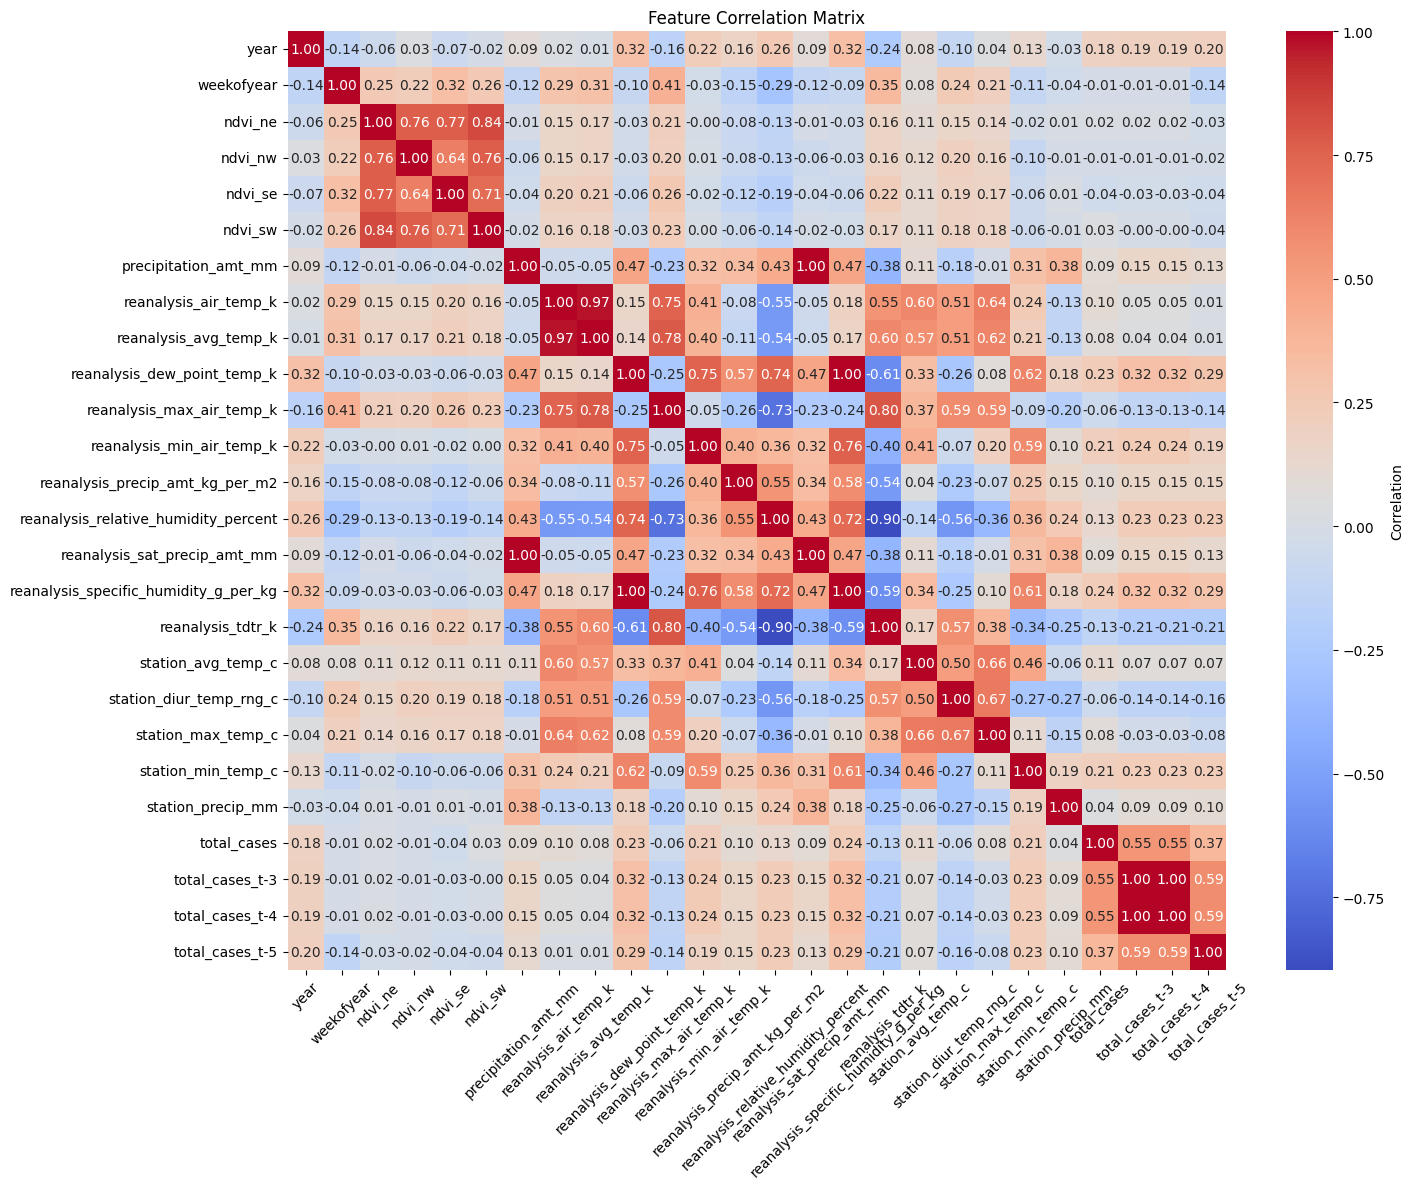

In [28]:
corr = iq_full_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"label": "Correlation"},
)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
iq_full_data

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
